# Data engineering

## Imports

In [1]:
import pandas as pd
import numpy as np
import math

## CSV bestanden

### CSV maken

In [2]:
# een data frame wegschrijven naar een bestand
f = pd.DataFrame({"a":["bla", "boe", "bla"], "b":[1.1, 2.2, 3.3]})
print(f)
# je kan ook de huidige directory wijzigen:
# import os
# os.chdir("/tmp")
f.to_csv("testje_nl.csv", sep=";", decimal=",", index=False)
f.to_csv("testje_en.csv", sep=",", decimal=".", index=False)

     a    b
0  bla  1.1
1  boe  2.2
2  bla  3.3


### CSV lezen

In [4]:
# Engelstalig bestand
data_en = pd.read_csv("data_en.csv", sep=",", decimal=".", header=0)
print(data_en)

   id  gewicht  lengte
0   1     43.2     154
1   2     55.1     160
2   3     45.7     148
3   4     61.4     161
4   5     51.1     165


In [5]:
# Nederlandstalig bestand
data_nl = pd.read_csv("data_nl.csv", sep=";", decimal=",", header=0)
print(data_nl)

   id  gewicht  lengte
0   1     43.2     154
1   2     55.1     160
2   3     45.7     148
3   4     61.4     161
4   5     51.1     165


In [7]:
# Met en zonder header
data_nl = pd.read_csv("data_nl.csv", sep=";", decimal=",", header=None)
print(data_nl)

    0        1       2
0  id  gewicht  lengte
1   1     43,2     154
2   2     55,1     160
3   3     45,7     148
4   4     61,4     161
5   5     51,1     165


In [6]:
# algemeen:
# data = pd.read_csv('bestandsnaam.csv', sep='separator', decimal='komma', skiprows=aantalCommentaarRegels, header=regelnummer, encoding='encodering')
data_nl = pd.read_csv("data_nl.csv", sep=";", decimal=",", skiprows=0, header=0, encoding='utf-8')
print(data_nl)

   id  gewicht  lengte
0   1     43.2     154
1   2     55.1     160
2   3     45.7     148
3   4     61.4     161
4   5     51.1     165


fouten bij inlezen:

In [8]:
tabel = pd.read_csv('bestand1.csv', sep=',')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 4, saw 3


In [10]:
tabel = pd.read_csv('bestand1.csv', sep=',', on_bad_lines='skip')

# Informatie verkrijgen

In [11]:
print(data_en)

   id  gewicht  lengte
0   1     43.2     154
1   2     55.1     160
2   3     45.7     148
3   4     61.4     161
4   5     51.1     165


In [12]:
print(data_en.head(n=3))

   id  gewicht  lengte
0   1     43.2     154
1   2     55.1     160
2   3     45.7     148


In [13]:
data_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       5 non-null      int64  
 1   gewicht  5 non-null      float64
 2   lengte   5 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 252.0 bytes


In [14]:
data_en.describe()

,id,gewicht,lengte
count,5.000000,5.000000,5.000000
mean,3.000000,51.300000,157.600000
std,1.581139,7.305135,6.655825
min,1.000000,43.200000,148.000000
25%,2.000000,45.700000,154.000000
50%,3.000000,51.100000,160.000000
75%,4.000000,55.100000,161.000000
max,5.000000,61.400000,165.000000


In [15]:
data_en.gewicht.describe()

count     5.000000
mean     51.300000
std       7.305135
min      43.200000
25%      45.700000
50%      51.100000
75%      55.100000
max      61.400000
Name: gewicht, dtype: float64

In [16]:
s = pd.Series(['bla', 'bla', 'boe', 'bie', 'boo', 'boo', 'bla'])
s.describe()

count       7
unique      4
top       bla
freq        3
dtype: object

## Ontbrekende waarden

In [17]:
data = pd.Series([1, np.nan, 2, None, pd.NA, math.nan])
print(data)

0       1
1     NaN
2       2
3    None
4    <NA>
5     NaN
dtype: object


In [18]:
print(data.isna())

0    False
1     True
2    False
3     True
4     True
5     True
dtype: bool


In [19]:
data.isna().sum()

4

In [20]:
data.dropna(inplace=True)
print(data)

0    1
2    2
dtype: object


werkt ook op tabellen:

In [21]:
df = pd.DataFrame({'a':[1, np.nan, 2, None, pd.NA, 3], 'b':range(6)})
df.iloc[2, 1] = math.nan
print(df)

      a    b
0     1  0.0
1   NaN  1.0
2     2  NaN
3  None  3.0
4  <NA>  4.0
5     3  5.0


In [22]:
df.isna().sum().sum() # totaal aantal ontbrekende waarden

4

In [23]:
df = df.dropna() # wis alle rijen met ontbrekende waarden
print(df)

   a    b
0  1  0.0
5  3  5.0


In [24]:
df.dropna(inplace=True)
print(df)

   a    b
0  1  0.0
5  3  5.0


## Ontbrekende waarden bij het inlezen

In [25]:
tabel = pd.read_csv('bestand2.csv', sep=';', decimal=',')
tabel.info() # lengte en gewicht werden niet herkend als getallen.  Waarom?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       4 non-null      int64 
 1   lengte   4 non-null      object
 2   gewicht  3 non-null      object
dtypes: int64(1), object(2)
memory usage: 228.0+ bytes


In [26]:
print(tabel)

   id   lengte gewicht
0   1      173    70.1
1   2      174    60.3
2   3    175,3     NaN
3   4  Missing      60


In [27]:
print(tabel.lengte.unique())

['173' '174' '175,3' 'Missing']


Zet alle komma's om naar punten in kolom "lengte":

In [28]:
tabel.lengte = tabel.lengte.str.replace(',', '.', regex=False)
print(tabel)

   id   lengte gewicht
0   1      173    70.1
1   2      174    60.3
2   3    175.3     NaN
3   4  Missing      60


Zet kolom "lengte" om naar getallen

In [29]:
tabel.lengte = pd.to_numeric(tabel.lengte, errors='coerce')
print(tabel)

   id  lengte gewicht
0   1   173.0    70.1
1   2   174.0    60.3
2   3   175.3     NaN
3   4     NaN      60


In [30]:
print(tabel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       4 non-null      int64  
 1   lengte   3 non-null      float64
 2   gewicht  3 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes
None


Zet kolom gewicht nu ook om naar getallen:

In [31]:
tabel.gewicht = pd.to_numeric(tabel.gewicht, errors='coerce')
print(tabel)
tabel.info()

   id  lengte  gewicht
0   1   173.0     70.1
1   2   174.0     60.3
2   3   175.3      NaN
3   4     NaN     60.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       4 non-null      int64  
 1   lengte   3 non-null      float64
 2   gewicht  3 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 228.0 bytes


Dit kon ook allemaal iets sneller:

In [32]:
tabel = pd.read_csv('bestand2.csv', sep=';', decimal='.', header=0, na_values=['Missing'])
tabel.lengte = tabel.lengte.str.replace(',', '.', regex=False)
tabel.lengte = pd.to_numeric(tabel.lengte, errors='coerce')
print(tabel)

   id  lengte  gewicht
0   1   173.0     70.1
1   2   174.0     60.3
2   3   175.3      NaN
3   4     NaN     60.0


In [33]:
tabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       4 non-null      int64  
 1   lengte   3 non-null      float64
 2   gewicht  3 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 228.0 bytes


In [34]:
tabel.describe()

,id,lengte,gewicht
count,4.000000,3.000000,3.000000
mean,2.500000,174.100000,63.466667
std,1.290994,1.153256,5.746593
min,1.000000,173.000000,60.000000
25%,1.750000,173.500000,60.150000
50%,2.500000,174.000000,60.300000
75%,3.250000,174.650000,65.200000
max,4.000000,175.300000,70.100000


## Ontbrekende waarden bij omzettingen

In [35]:
kolom = pd.Series(['a', 'b', 'a', 'c', 'a', 'b'])
cats = pd.Categorical(kolom, categories=['a', 'b'])
print(cats)

['a', 'b', 'a', NaN, 'a', 'b']
Categories (2, object): ['a', 'b']


In [36]:
print(kolom.unique())

['a' 'b' 'c']


## Omgaan met ontbrekende waarden

Niets doen...

## Omgaan met ontbrekende waarden: verwijderen

In [37]:
print(tabel.dropna(axis='rows'))

   id  lengte  gewicht
0   1   173.0     70.1
1   2   174.0     60.3


In [38]:
print(tabel.dropna(axis='columns'))

   id
0   1
1   2
2   3
3   4


## Omgaan met ontbrekende waarden: vervangen

In [39]:
waarden = ['geslaagd', 'geslaagd', np.nan, 'niet geslaagd']
scores = pd.Series(waarden)
print(scores)

0         geslaagd
1         geslaagd
2              NaN
3    niet geslaagd
dtype: object


In [40]:
scores.fillna("niet deelgenomen", inplace=True)
print(scores)

0            geslaagd
1            geslaagd
2    niet deelgenomen
3       niet geslaagd
dtype: object


Let op: vervang ontbrekende getallen niet zomaar door 0!  Dat beïnvloed de data te veel.

## Interpoleren

In [41]:
waarden = [18.4, math.nan, 19.5, 20.5, 20.5, 19.5, math.nan, 17.8]
temps = pd.Series(waarden)
print(temps.tolist())

[18.4, nan, 19.5, 20.5, 20.5, 19.5, nan, 17.8]


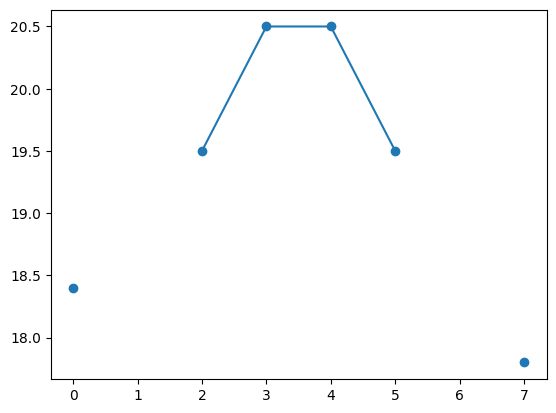

In [56]:
import matplotlib.pyplot as plt
plt.plot(temps, 'o-')

In [57]:
new_temps = temps.interpolate() # lineaire interpolatie
print(new_temps.tolist())

[18.4, 18.95, 19.5, 20.5, 20.5, 19.5, 18.65, 17.8]


In [58]:
(18.4+19.5)/2

18.95

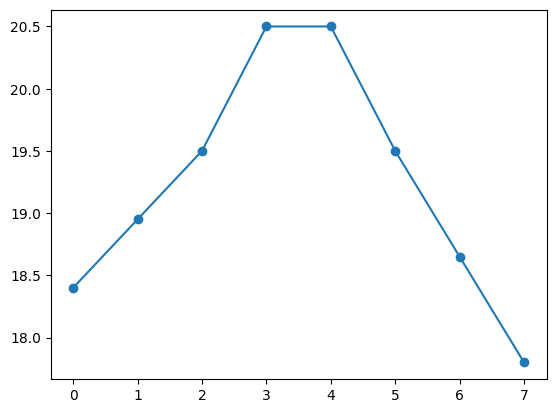

In [59]:
plt.plot(new_temps, 'o-')

In [60]:
new_temps = temps.interpolate(method='spline', order=3) # cubic splines
print(new_temps.tolist())

ImportError: Missing optional dependency 'scipy'. spline interpolation requires SciPy. Use pip or conda to install scipy.

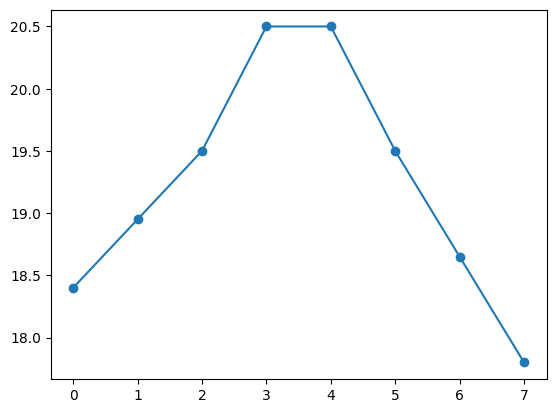

In [61]:
plt.plot(new_temps, 'o-')

## Verkeerde waarden

In [62]:
geslacht = pd.Series(['v', 'm', 'x', 'f', 'v', 'm', 'v', 'v'])
x = range(8)
tabel = pd.DataFrame({'geslacht': geslacht, 'x': x})
print(tabel)

  geslacht  x
0        v  0
1        m  1
2        x  2
3        f  3
4        v  4
5        m  5
6        v  6
7        v  7


In [63]:
print(tabel.geslacht.unique())

['v' 'm' 'x' 'f']


In [64]:
rijen = tabel.geslacht == 'f'
print(rijen)

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7    False
Name: geslacht, dtype: bool


In [65]:
tabel.loc[rijen, 'geslacht'] = 'v'
print(tabel)

  geslacht  x
0        v  0
1        m  1
2        x  2
3        v  3
4        v  4
5        m  5
6        v  6
7        v  7


## Delen vervangen

In [66]:
kolom = pd.Series(['dit ', 'en dat', 'is een testje '])
print(kolom)

0              dit 
1            en dat
2    is een testje 
dtype: object


In [67]:
kolom = kolom.str.replace(' ', '_', regex=False)
print(kolom)

0              dit_
1            en_dat
2    is_een_testje_
dtype: object


In [68]:
kolom = kolom.str.replace('d.t', 'dot', regex=True)
print(kolom)

0              dot_
1            en_dot
2    is_een_testje_
dtype: object


## Datatypes

In [81]:
tabel = pd.read_csv('bestand3.csv', sep=',', decimal='.', header=0, na_values=['Onbekend'])
tabel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datum            5 non-null      object 
 1   tijdstip         5 non-null      object 
 2   waarde           4 non-null      float64
 3   betrouwbaarheid  4 non-null      object 
dtypes: float64(1), object(3)
memory usage: 292.0+ bytes


In [82]:
print(tabel)

        datum tijdstip  waarde betrouwbaarheid
0  2022-01-01    00:00     3.5          slecht
1  2022-01-02    00:05     3.4            goed
2  2022-01-03    00:10     NaN    ontoereikend
3  2022-01-04    00:15     3.2            goed
4  2022-01-05     1:15     3.1             NaN


In [71]:
tabel.waarde = pd.to_numeric(tabel.waarde, errors='coerce')
print(tabel.waarde)
# kan je dit ook bij het inlezen al oplossen?

0    3.5
1    3.4
2    NaN
3    3.2
4    3.1
Name: waarde, dtype: float64


In [72]:
print(tabel.betrouwbaarheid.unique())

['slecht' 'goed' 'ontoereikend' nan]


In [73]:
cats = [ "ontoereikend", "slecht", "goed"]
tabel.betrouwbaarheid = pd.Categorical(tabel.betrouwbaarheid, categories=cats, ordered=True)
print(tabel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   datum            5 non-null      object  
 1   tijdstip         5 non-null      object  
 2   waarde           4 non-null      float64 
 3   betrouwbaarheid  4 non-null      category
dtypes: category(1), float64(1), object(2)
memory usage: 389.0+ bytes
None


In [74]:
tabel.datum = pd.to_datetime(tabel.datum, format='%Y-%m-%d')
print(tabel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datum            5 non-null      datetime64[ns]
 1   tijdstip         5 non-null      object        
 2   waarde           4 non-null      float64       
 3   betrouwbaarheid  4 non-null      category      
dtypes: category(1), datetime64[ns](1), float64(1), object(1)
memory usage: 389.0+ bytes
None


In [75]:
tabel.tijdstip = pd.to_datetime(tabel.tijdstip, format='%H:%M')
print(tabel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   datum            5 non-null      datetime64[ns]
 1   tijdstip         5 non-null      datetime64[ns]
 2   waarde           4 non-null      float64       
 3   betrouwbaarheid  4 non-null      category      
dtypes: category(1), datetime64[ns](2), float64(1)
memory usage: 389.0 bytes
None


In [76]:
print(tabel) # bemerk dat een tijdstip altijd een datum bevat

       datum            tijdstip  waarde betrouwbaarheid
0 2022-01-01 1900-01-01 00:00:00     3.5          slecht
1 2022-01-02 1900-01-01 00:05:00     3.4            goed
2 2022-01-03 1900-01-01 00:10:00     NaN    ontoereikend
3 2022-01-04 1900-01-01 00:15:00     3.2            goed
4 2022-01-05 1900-01-01 01:15:00     3.1             NaN


In [77]:
print(tabel.tijdstip.dt.time)

0    00:00:00
1    00:05:00
2    00:10:00
3    00:15:00
4    01:15:00
Name: tijdstip, dtype: object
